In [1]:
import pandas as pd
import numpy as np

cars = pd.read_csv('cars.csv')

In [2]:
X = cars['speed'].values.reshape(-1,1)
y = cars['dist'].values.reshape(-1,1)

In [3]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [4]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

MSEs = []
r2s = []

folds = 3
kfold = KFold(n_splits=folds, random_state=100, shuffle=True)
for train, test in kfold.split(X, y):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    MSEs.append(mean_squared_error(y_test,y_pred))
    r2s.append(r2_score(y_test,y_pred))

In [5]:
mean_r2 = np.mean(r2s)
std_r2 = np.std(r2s)

mean_MSE = np.mean(MSEs)
std_MSE = np.std(MSEs)

print("Across {} folds:\n\nAverage Mean Squared Error: {}\nStandard deviation of Mean Squared Error: {}\n\nAverage R-squared: {}\nStandard deviation of R-squared: {}".format(folds,mean_MSE,std_MSE,mean_r2,std_r2))

Across 3 folds:

Average Mean Squared Error: 238.87631500008487
Standard deviation of Mean Squared Error: 55.12940144682395

Average R-squared: 0.6238196315855414
Standard deviation of R-squared: 0.07333027853801395


[Text(0.5, 1.0, 'MSE across folds')]

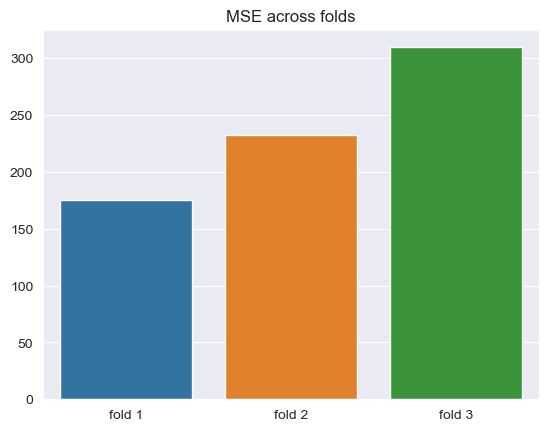

In [6]:
import seaborn as sns

sns.barplot(x=['fold 1','fold 2','fold 3'],y = MSEs).set(title='MSE across folds')

[Text(0.5, 1.0, 'R-squared values across folds')]

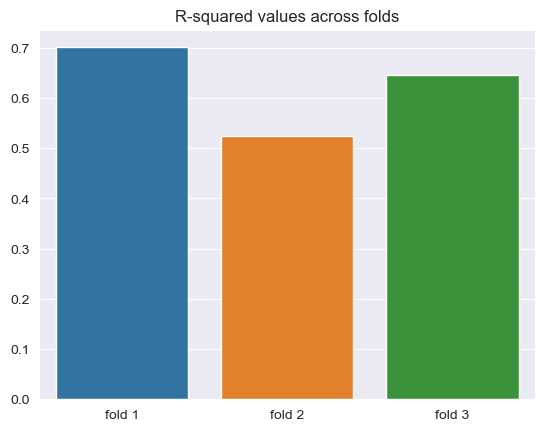

In [7]:
sns.barplot(x=['fold 1','fold 2','fold 3'],y = r2s).set(title='R-squared values across folds')

In [8]:

regressor.fit(X,y)

LinearRegression()

In [25]:
intercept = regressor.intercept_[0].round(3)
speed_coef = regressor.coef_[0][0].round(3)
model_score = (regressor.score(X,y)*100).round(1)

In [19]:
print("Dependent variable \'speed\' coefficient: {}".format(speed_coef))

Dependent variable 'speed' coefficient: 3.932


In [20]:
print("Model intercept: {}".format(intercept))

Model intercept: -17.579


In [26]:
print("Model R-squared score: {}%".format(model_score))

Model R-squared score: 65.1%


In [29]:
print("Model formula")
print("*"*50)
print("\ny = {} + {} x".format(intercept,speed_coef))

Model formula
**************************************************

y = -17.579 + 3.932 x


In [31]:
import statsmodels.api as sm

X = sm.add_constant(X)
regressor = sm.OLS(y,X).fit()

In [33]:
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           1.49e-12
Time:                        23:58:15   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.5791      6.758     -2.601      0.0